In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

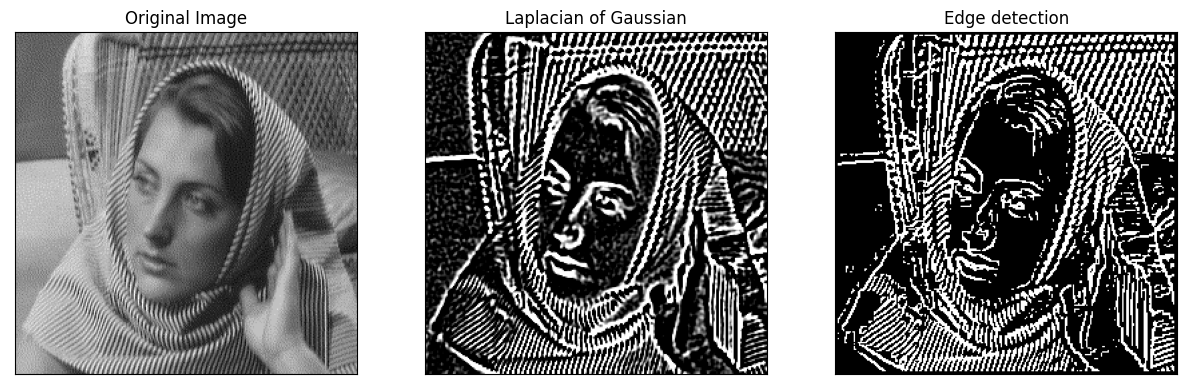

In [10]:
img = cv2.imread("images/woman.png", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian filter to image
gaussian_img = cv2.GaussianBlur(img, (5,5), 0)

# Apply Laplacian filter to Gaussian
laplace_img = cv2.Laplacian(gaussian_img, cv2.CV_8U, ksize=5)

# Create a thresholding array with to contain zero crossings
N,M = laplace_img.shape
threshold = 0.75*np.amax(laplace_img)
thresh_img = np.zeros(shape = (N,M), dtype = np.uint8)

# Find zero crossings by iterating over entire img, taking patches 
# and checking if patches contain both + and - numbers
for i in range(2, N-2):
    for j in range(2, M-2):
        patch = laplace_img[i-2:i+3, j-2:j+3]
        pixel = laplace_img[i,j]
        max_pixel = patch.max()
        min_pixel = patch.min()
        if(pixel > 0):
            zeroCross = True if min_pixel < 0 else False
        else:
            zeroCross = True if max_pixel > 0 else False
        
        if(max_pixel - min_pixel) > threshold and zeroCross:
            thresh_img[i,j] = 255
        else:
            thresh_img[i,j] = 0
            
            
plt.figure(figsize = (15,15))
plt.subplot(131), plt.imshow(img, cmap ='gray'), plt.title("Original Image")
plt.xticks([]), plt.yticks([]) 
plt.subplot(132), plt.imshow(laplace_img, cmap ='gray'), plt.title("Laplacian of Gaussian")
plt.xticks([]), plt.yticks([])       
plt.subplot(133), plt.imshow(thresh_img, cmap ='gray'), plt.title("Edge detection")
plt.xticks([]), plt.yticks([])
plt.show()